In [1]:
import sys, getopt, os
import bonesis
import pandas as pd
from colomoto_jupyter import tabulate
import mpbn
import itertools
import math
import numpy
import networkx as nx
import pickle
#import ginsim
import re
import subprocess
import numpy as np
from matplotlib import pyplot as plt
from math import isnan

In [2]:
sys.path.append('../py_src/')

import constraints
import funForBonesis

In [3]:
geneOrder = ["Junb","Gata2","Tal1","Bclaf1","Myc","Spi1","Ikzf1","Gata1","Klf1","Cebpa","Fli1","Zfpm1","CDK46CycD","CIPKIP"]


In [4]:
#geneOrder = ["Egr1","Junb","Tal1","Bclaf1","Myc","Fli1","Gata2","Ikzf1","Spi1","Cebpa","Gata1","Klf1","Zfpm1","CDK46CycD","CIPKIP"]


#dataTable = pd.read_csv("tables/obsDataOneDiffForAll.csv",index_col = 0)
#data = dataTable.to_dict("index")
#clean_data = dict()
#for o in data.keys():
#    clean_data[o] = {k: data[o][k] for k in data[o] if not isnan(data[o][k])}

#data= clean_data
#data["G0MkHSC"] = {'Junb': 1.0,'CIPKIP': 1,"Ikzf1":0,"Cebpa":0,"Klf1":0,"Spi1":0,"CDK46CycD":0}
#data["prolifNeuMast"] = {'Egr1': 0.0,'Junb': 0.0,'Tal1': 0.0,'Fli1': 0.0,'Ikzf1': 0,'Spi1': 1,'Cebpa': 1,'Klf1': 0,'Zfpm1': 0.0,'CIPKIP': 0,"CDK46CycD":1}


#obsData = pd.DataFrame.from_dict(data, orient="index").fillna('*')[geneOrder]

#Add some mutant obs

#obsData = obsData[geneOrder].reindex(["iHSC", "srHSC", "qHSC","diff","pLymph","pNeuMast","pMk","pEr","zero","G0MkHSC",'prolifNeuMast'])


#obsData = obsData.transpose()

#obsDataView = obsData.style.apply(lambda x: ["background: black" if v == "*" else  "background: yellow" if v == 1 else "background: purple" for v in x], axis = 1)
#obsDataView.set_precision(0)

In [5]:
def add_obs_mutant_nonReach(mutation, phenotypes,data):
    for p in phenotypes:
        pMut = p+"_"+[*mutation][0]+"_"+str([*mutation.values()][0])
        data[pMut] = data[p].copy()
        data[pMut][[*mutation][0]] = [*mutation.values()][0]

In [6]:
#geneOrder = ["Junb","Gata2","Tal1","Bclaf1","Myc","Spi1","Ikzf1","Gata1","Klf1","Cebpa","Fli1","Zfpm1","CDK46CycD","CIPKIP"]
geneOrder = ["Egr1","Junb","Tal1","Bclaf1","Myc","Fli1","Gata2","Ikzf1","Spi1","Cebpa","Gata1","Klf1","Zfpm1","CDK46CycD","CIPKIP"]


dataTable = pd.read_csv("obsDataPhenoMut.csv",index_col = 0)
#dataTable.index = ['iHSC', 'srHSC', 'qHSC', 'pLymph',"pNeuMast","pMk","pEr","diff","diff2","zero"] 
dataTable
data = dataTable.to_dict("index")
clean_data = dict()
for o in data.keys():
    clean_data[o] = {k: data[o][k] for k in data[o] if not isnan(data[o][k])}

data= clean_data
#data["G0MkHSC"] = {"Klf1":0,'Junb': 1,'Tal1':1,'CIPKIP': 1,"Ikzf1":0,"Cebpa":0,"Spi1":0,"CDK46CycD":0}
#data["prolifNeuMast"] = {'Egr1': 0,'Junb': 0,'Tal1': 0,'Fli1': 0,'Spi1': 1,'Cebpa': 1,'Klf1': 0,'Zfpm1': 0.0,'CIPKIP': 0,"CDK46CycD":1}
#add_obs_mutant_nonReach({'Gata1': 0},["pEr","pMk"],data)
#add_obs_mutant_nonReach({'Fli1': 0},["pMk"],data)



In [7]:
    

obsData = pd.DataFrame.from_dict(data, orient="index").fillna('*')[geneOrder]

#Add some mutant obs

obsData = obsData[geneOrder].reindex(["iHSC", "srHSC", "qHSC","diff","pLymph","pNeuMast","pMk","pEr","zero","G0MkHSC",'prolifNeuMast'])


obsData = obsData.transpose()

obsDataView = obsData.style.apply(lambda x: ["background: black" if v == "*" else  "background: yellow" if v == 1 else "background: purple" for v in x], axis = 1)
obsDataView.set_precision(0)

,iHSC,srHSC,qHSC,diff,pLymph,pNeuMast,pMk,pEr,zero,G0MkHSC,prolifNeuMast
Egr1,0,*,1,0,0,0,0,0,0,*,0
Junb,0,0,1,0,0,0,0,0,0,1,0
Tal1,1,1,1,*,*,0,1,1,0,1,0
Bclaf1,*,*,0,1,*,0,*,*,0,*,*
Myc,0,0,*,1,*,*,*,*,0,*,*
Fli1,1,1,1,0,0,0,1,0,0,*,0
Gata2,*,0,1,*,0,*,*,*,0,*,*
Ikzf1,0,0,0,0,1,0,0,0,0,0,0
Spi1,0,0,0,1,1,1,0,0,0,0,1
Cebpa,0,0,0,0,0,1,0,0,0,0,1


In [8]:
obsData = pd.DataFrame.from_dict(data, orient="index").fillna('*')[geneOrder]
obsData

,Egr1,Junb,Tal1,Bclaf1,Myc,Fli1,Gata2,Ikzf1,Spi1,Cebpa,Gata1,Klf1,Zfpm1,CDK46CycD,CIPKIP
iHSC,0,0,1,*,0,1,*,0,0,0,0,0,0,0,0
qHSC,1,1,1,0,*,1,1,0,0,0,0,0,0,*,1
pLymph,0,0,*,*,*,0,0,1,1,0,0,0,0,*,0
pNeuMast,0,0,0,0,*,0,*,0,1,1,0,0,0,*,0
pMk,0,0,1,*,*,1,*,0,0,0,1,0,1,*,0
pEr,0,0,1,*,*,0,*,0,0,0,1,1,1,*,0
diff,0,0,*,1,1,0,*,0,1,0,0,0,0,1,0
diff2,0,0,*,1,1,0,*,0,1,0,0,0,0,1,0
zero,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
prolifNeuMast,0,0,0,*,*,0,*,0,1,1,*,0,0,1,0


In [9]:
#obsDataSave = pd.DataFrame.from_dict(data, orient="index").fillna('')[geneOrder]
#obsDataSave.to_csv("obsDataPhenoMut.csv")

# computing graph layout...


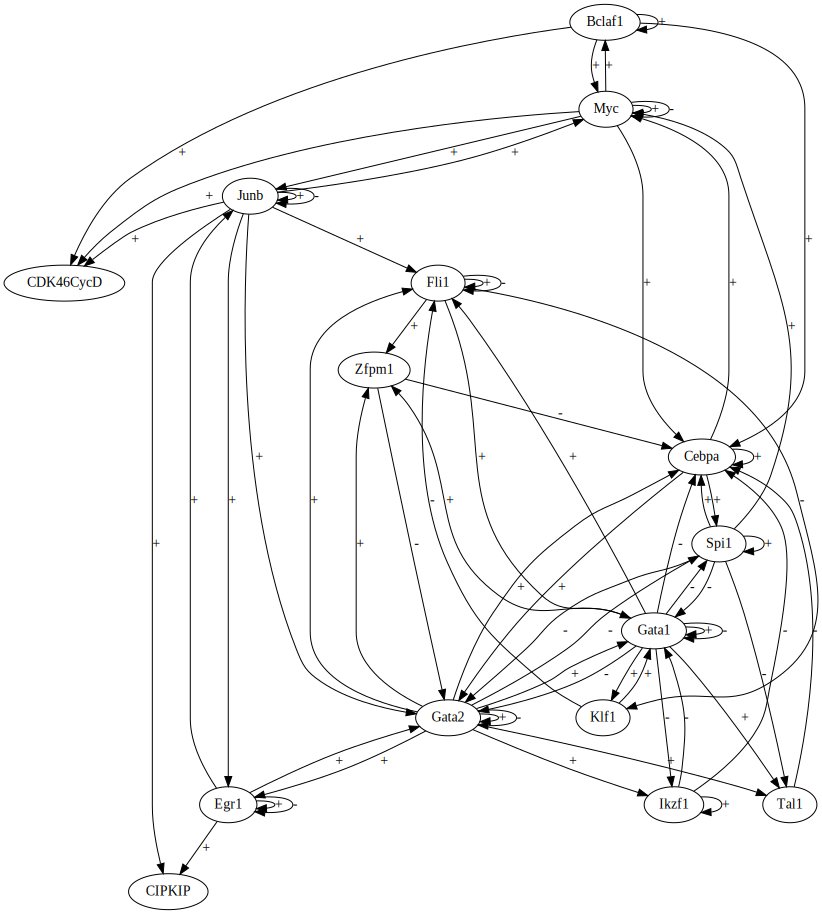

In [10]:
influenceGraphTable = pd.read_table("../output/Inference/infGraphLargeTrusted/infGraphTable45.tsv")
influenceGraphTable = influenceGraphTable.drop_duplicates(subset=['tf', 'target', 'mor'])
len(influenceGraphTable)
    
# Loading constraints
    
# Creating influence graph
inf = []
for r in influenceGraphTable.index:
    inf.append((influenceGraphTable["tf"][r],influenceGraphTable["target"][r],dict(sign= influenceGraphTable["mor"][r])))

dom = bonesis.InfluenceGraph(inf, maxclause = 3,exact=True)


#len(dom.edges())

dom

In [11]:
len(inf)

66

In [12]:
def mutant_constraint(mutation, phenotypes):
    with bo.mutant(mutation) as m:
        # each phenotype can be reached from at least one init
        for ph in phenotypes:
            +m.obs("iHSC") >= m.fixed(+m.obs(ph))
        # each possible initial configuration can only reach fixed points matching with phenotypes
        for cfg in bonesis.matching_configurations(m.obs("iHSC")):
            cfg >> "fixpoints" ^ {m.obs(ph) for ph in phenotypes}

In [13]:
def mutant_constraint_nonReach(mutation, phenotypes):
    with bo.mutant(mutation) as m:
        # each possible initial configuration can not reach fixed points matching with phenotypes
        for cfg in bonesis.matching_configurations(m.obs("iHSC")):
            cfg / {m.obs(ph) for ph in phenotypesMut}

In [14]:
dom = bonesis.InfluenceGraph(inf, maxclause = 3,exact=False)
dom
bo = bonesis.BoNesis(dom, data)
bo.settings["parallel"] = 24
fLymph = bo.fixed(~bo.obs("pLymph"))
fEr = bo.fixed(~bo.obs("pEr"));
fMk = bo.fixed(~bo.obs("pMk"));
fNeuMast = bo.fixed(~bo.obs("pNeuMast"));
start = ~bo.obs("iHSC")
start >= ~bo.obs("srHSC")
start >= fLymph;
start >= fEr;
start >= fMk;
start >= fNeuMast;   
start >= ~bo.obs("qHSC");
start >= ~bo.obs("diff");
~bo.obs("diff") >= fEr
~bo.obs("diff") >= fMk
~bo.obs("diff") >= fNeuMast
~bo.obs("qHSC") >= ~bo.obs("diff")
~bo.obs("srHSC") >= ~bo.obs("qHSC")
~bo.obs("srHSC") >= start
~bo.obs("qHSC") >= start
~bo.obs("diff") / ~bo.obs("qHSC")
~bo.obs("diff") / ~bo.obs("srHSC")
~bo.obs("diff") / start
~bo.obs('zero') / fNeuMast
~bo.obs('zero') / fMk
~bo.obs('zero') / fLymph
~bo.obs("iHSC") >> "fixpoints" ^ {bo.obs(obs) for obs in ["pLymph", "pNeuMast","pEr","pMk"]};

In [16]:
solutions = []
for bn in bo.diverse_boolean_networks(): # limit is optional
    if(funForBonesis.has_cyclic(bn)):
        print("HAS CYCLIC ATTRACTORS, IGNORING")
        continue
    if len(solutions) > 500:
        break
    solutions.append(bn)
    print(len(solutions))
print(len(solutions))

Grounding...done in 0.2s
Found 1 solutions in 5.1s (first in 5.1s; rate 5.1s)1
Found 2 solutions in 5.2s (first in 5.1s; rate 2.6s)2
Found 3 solutions in 5.3s (first in 5.1s; rate 1.8s)3
Found 4 solutions in 5.4s (first in 5.1s; rate 1.4s)4
Found 5 solutions in 5.5s (first in 5.1s; rate 1.1s)5
Found 6 solutions in 5.6s (first in 5.1s; rate 0.9s)6
Found 7 solutions in 5.7s (first in 5.1s; rate 0.8s)7
Found 8 solutions in 5.8s (first in 5.1s; rate 0.7s)8
Found 9 solutions in 5.9s (first in 5.1s; rate 0.7s)9
Found 10 solutions in 6.0s (first in 5.1s; rate 0.6s)10
Found 11 solutions in 6.1s (first in 5.1s; rate 0.6s)11
Found 12 solutions in 6.2s (first in 5.1s; rate 0.5s)12
Found 13 solutions in 6.3s (first in 5.1s; rate 0.5s)13
Found 14 solutions in 6.5s (first in 5.1s; rate 0.5s)14
Found 15 solutions in 6.6s (first in 5.1s; rate 0.4s)15
Found 16 solutions in 6.7s (first in 5.1s; rate 0.4s)16
Found 17 solutions in 6.8s (first in 5.1s; rate 0.4s)17
Found 18 solutions in 7.3s (first in 5.1s

In [17]:
len(solutions)

101

In [18]:
def getMutAttractors(geneMut,ko,sol):
    mut = []
    for s in solutions :
        m = s.copy()
        if ko :
            koStr = "KO"
            m[geneMut] = 0

        else:
            koStr = "KI"
            m[geneMut] = 1

        possiblePhDf = pd.DataFrame(m.attractors(reachable_from=data["iHSC"]))
        possiblePhDf.sort_values(by= geneOrder, inplace=True)
        possiblePhDf.index = [str(i) for i in range(0,len(possiblePhDf))]
        possiblePh = possiblePhDf.to_dict() 
        #print(m)
        if possiblePh not in mut:
            mut.append(possiblePh)
    possiblePhAll = pd.DataFrame(mut[0])
    possiblePhAll = possiblePhAll.rename(index=lambda s: geneMut + koStr + "_0" + "_" + s)
    i=1
    for a in mut[1:]:
        df = pd.DataFrame(a)
        df.index = [str(j) for j in range(0,len(df))]
        df = df.rename(index=lambda s: geneMut + koStr +"_"+ str(i) + "_" + s)
        possiblePhAll = possiblePhAll.append(df)

        i += 1

    return possiblePhAll



In [19]:
getMutAttractors(geneMut="Spi1",ko = True,sol=solutions)

,Zfpm1,Tal1,Spi1,Myc,Klf1,Junb,Ikzf1,Gata2,Gata1,Fli1,Egr1,Cebpa,CIPKIP,CDK46CycD,Bclaf1
Spi1KO_0_0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0
Spi1KO_0_1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0


In [20]:
getMutAttractors(geneMut="Cebpa",ko = True,sol=solutions)

,Zfpm1,Tal1,Spi1,Myc,Klf1,Junb,Ikzf1,Gata2,Gata1,Fli1,Egr1,Cebpa,CIPKIP,CDK46CycD,Bclaf1
CebpaKO_0_0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0
CebpaKO_0_1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0


In [21]:
JunbKo = getMutAttractors(geneMut="Junb",ko = True,sol=solutions)
JunbKo

,Zfpm1,Tal1,Spi1,Myc,Klf1,Junb,Ikzf1,Gata2,Gata1,Fli1,Egr1,Cebpa,CIPKIP,CDK46CycD,Bclaf1
JunbKO_0_0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
JunbKO_0_1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
JunbKO_0_2,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0
JunbKO_0_3,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0
JunbKO_1_0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
JunbKO_1_1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
JunbKO_1_2,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1
JunbKO_1_3,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0
JunbKO_1_4,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0
JunbKO_2_0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
JunbKo = getMutAttractors(geneMut="Junb",ko = False,sol=solutions)
JunbKo

In [22]:
getMutAttractors(geneMut="Egr1",ko = True,sol=solutions)

,Zfpm1,Tal1,Spi1,Myc,Klf1,Junb,Ikzf1,Gata2,Gata1,Fli1,Egr1,Cebpa,CIPKIP,CDK46CycD,Bclaf1
Egr1KO_0_0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
Egr1KO_0_1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
Egr1KO_0_2,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0
Egr1KO_0_3,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0


In [23]:
getMutAttractors(geneMut="Egr1",ko = False,sol=solutions)

,Zfpm1,Tal1,Spi1,Myc,Klf1,Junb,Ikzf1,Gata2,Gata1,Fli1,Egr1,Cebpa,CIPKIP,CDK46CycD,Bclaf1
Egr1KI_0_0,*,0,1,0,0,*,1,0,0,*,1,0,*,*,0
Egr1KI_0_1,1,1,0,0,0,*,0,0,1,1,1,0,*,*,0
Egr1KI_1_0,0,0,1,0,0,*,1,0,0,*,1,0,*,*,0
Egr1KI_1_1,1,1,0,0,0,*,0,0,1,1,1,0,*,*,0
Egr1KI_2_0,*,0,1,0,0,*,1,*,0,*,1,0,*,*,0
Egr1KI_2_1,1,1,0,0,0,*,0,0,1,1,1,0,*,*,0
Egr1KI_3_0,0,0,1,0,0,*,1,0,0,*,1,0,*,0,0
Egr1KI_3_1,1,1,0,0,0,*,0,0,1,1,1,0,*,0,0
Egr1KI_4_0,1,1,0,0,0,*,0,0,1,1,1,0,*,*,0
Egr1KI_5_0,*,0,1,*,0,*,1,*,0,*,1,*,1,*,*


In [ ]:
getMutAttractors(geneMut="Gata2",ko = True,sol=solutions)

In [ ]:
getMutAttractors(geneMut="Gata1",ko = True,sol=solutions)

In [ ]:
getMutAttractors(geneMut="Myc",ko = True,sol=solutions)

In [ ]:
getMutAttractors(geneMut="Ikzf1",ko = True,sol=solutions)


In [ ]:
getMutAttractors(geneMut="Bclaf1",ko = True,sol=solutions)

In [ ]:
getMutAttractors(geneMut="Tal1",ko = True,sol=solutions)


In [ ]:
Zfpm1KOs = getMutAttractors(geneMut="Zfpm1",ko = True,sol=solutions)
Zfpm1KOs

In [ ]:
Zfpm1KOs.to_csv("Zfpm1KOs.csv")

In [ ]:
getMutAttractors(geneMut="Klf1",ko = True,sol=solutions)


In [ ]:
getMutAttractors(geneMut="Fli1",ko = True,sol=solutions)
